In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from sklearn import svm
from sklearn.metrics import accuracy_score

In [10]:
# Define the path to your dataset folder (the parent folder containing class folders)
dataset_dir = 'G:\Data\TB\TB_Chest_Radiography_Database'  # Replace with the path to your dataset directory

# Create a list of class names based on the subdirectories in the dataset directory
class_names = os.listdir(dataset_dir)

# Calculate the number of classes based on the class_names list
num_classes = len(class_names)

In [11]:
# Define image dimensions and batch size
image_size = (224, 224)
batch_size = 32


In [12]:
# Create a data generator for the CNN
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Adjust validation split as needed
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use 'training' subset for training data
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use 'validation' subset for validation data
)


Found 3360 images belonging to 2 classes.
Found 840 images belonging to 2 classes.


In [13]:
# Build and train the CNN model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, validation_data=validation_generator, epochs=10)


Epoch 1/10
105/105 [==============================] - 1668s 16s/step - loss: 0.2418 - accuracy: 0.9405 - val_loss: 0.0628 - val_accuracy: 0.9821
Epoch 2/10
105/105 [==============================] - 1632s 16s/step - loss: 0.0271 - accuracy: 0.9932 - val_loss: 0.0486 - val_accuracy: 0.9893
Epoch 3/10
105/105 [==============================] - 1728s 16s/step - loss: 0.0110 - accuracy: 0.9976 - val_loss: 0.0390 - val_accuracy: 0.9845
Epoch 4/10
105/105 [==============================] - 2203s 21s/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.0330 - val_accuracy: 0.9881
Epoch 5/10
105/105 [==============================] - 2113s 20s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0371 - val_accuracy: 0.9917
Epoch 6/10
105/105 [==============================] - 1571s 15s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0339 - val_accuracy: 0.9917
Epoch 7/10
105/105 [==============================] - 1445s 14s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0328 - val_ac

In [25]:

# Use the trained CNN to extract features from the validation set
cnn_features = model.predict(validation_generator)

27/27 [==============================] - 542s 19s/step


In [27]:
# Build and train the SVM classifier on the CNN features
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(cnn_features, validation_generator.classes)

SVC(kernel='linear')

In [28]:
# Evaluate the SVM classifier on the validation set
svm_predictions = svm_classifier.predict(cnn_features)
true_labels = validation_generator.classes
accuracy = accuracy_score(true_labels, svm_predictions)
print(f'Accuracy of the hybrid CNN-SVM model: {accuracy * 100:.2f}%')

Accuracy of the hybrid CNN-SVM model: 83.33%


In [29]:
from sklearn.metrics import classification_report

# Assuming you have made predictions using your model (replace 'predictions' with your actual predictions)
predictions = model.predict(validation_generator)

# Convert one-hot encoded predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the validation dataset (replace 'true_labels' with your actual true labels)
true_labels = validation_generator.classes

# Generate and print the classification report
report = classification_report(true_labels, predicted_labels)
print(report)


27/27 [==============================] - 424s 16s/step
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       700
           1       0.20      0.19      0.20       140

    accuracy                           0.74       840
   macro avg       0.52      0.52      0.52       840
weighted avg       0.73      0.74      0.74       840



In [30]:
from sklearn.metrics import confusion_matrix

# Assuming you have made predictions using your model (replace 'predictions' with your actual predictions)
predictions = model.predict(validation_generator)

# Convert one-hot encoded predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the validation dataset (replace 'true_labels' with your actual true labels)
true_labels = validation_generator.classes

# Generate the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)


27/27 [==============================] - 427s 16s/step
Confusion Matrix:
[[595 105]
 [111  29]]


Epoch 1/10
105/105 [==============================] - 1821s 17s/step - loss: 3.3063e-04 - accuracy: 1.0000 - val_loss: 0.0349 - val_accuracy: 0.9929
Epoch 2/10
105/105 [==============================] - 2192s 21s/step - loss: 2.7248e-04 - accuracy: 1.0000 - val_loss: 0.0349 - val_accuracy: 0.9917
Epoch 3/10
105/105 [==============================] - 2222s 21s/step - loss: 2.2598e-04 - accuracy: 1.0000 - val_loss: 0.0374 - val_accuracy: 0.9929
Epoch 4/10
105/105 [==============================] - 2280s 22s/step - loss: 1.9067e-04 - accuracy: 1.0000 - val_loss: 0.0388 - val_accuracy: 0.9929
Epoch 5/10
105/105 [==============================] - 2172s 21s/step - loss: 1.6372e-04 - accuracy: 1.0000 - val_loss: 0.0387 - val_accuracy: 0.9929
Epoch 6/10
105/105 [==============================] - 2115s 20s/step - loss: 1.4106e-04 - accuracy: 1.0000 - val_loss: 0.0346 - val_accuracy: 0.9917
Epoch 7/10
105/105 [==============================] - 2074s 20s/step - loss: 1.2555e-04 - accuracy: 1.0000

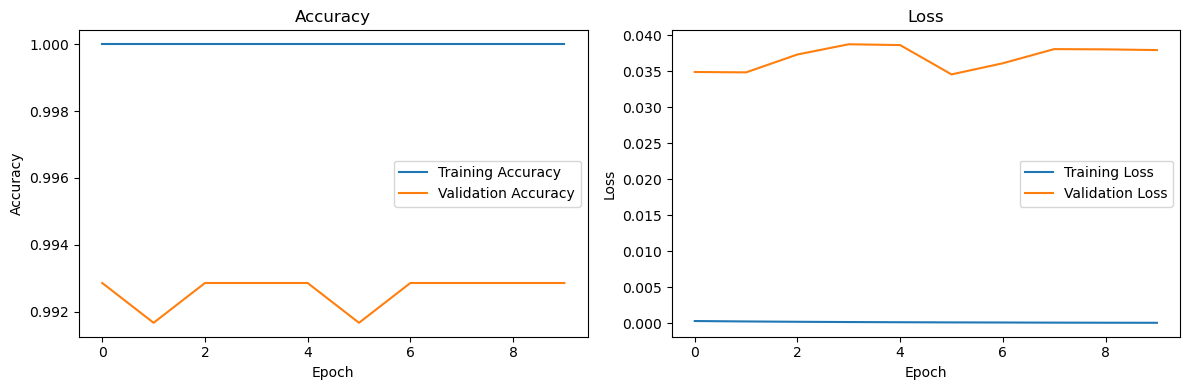

In [31]:
import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()
   

In [32]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have made predictions using your model (replace 'predictions' with your actual predictions)
predictions = model.predict(validation_generator)

# Convert one-hot encoded predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the validation dataset (replace 'true_labels' with your actual true labels)
true_labels = validation_generator.classes

# Print the classification report
report = classification_report(true_labels, predicted_labels, target_names=['Normal', 'Tuberculosis'])
print("Classification Report:")
print(report)

# Generate the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion)


27/27 [==============================] - 471s 16s/step
Classification Report:
              precision    recall  f1-score   support

      Normal       0.84      0.85      0.84       700
Tuberculosis       0.20      0.19      0.20       140

    accuracy                           0.74       840
   macro avg       0.52      0.52      0.52       840
weighted avg       0.73      0.74      0.74       840


Confusion Matrix:
[[593 107]
 [113  27]]
